# Teaching A Machine To Add

###### Introduction 
In this project, I am examining a few machine learning models. With each of these models, I am asking the following questions: 
* How well will this model predict the addition of 2 numbers? 
* What if it were given imperfect data?
* How would more data relate to predictive ability?
    
The purpose of this study is to get a better understanding of how each of these models behave. 

###### Rules For This Experiment: 
1. No feature engineering or excluding outliers. Otherwise, the problem is solved before the machine learning model starts.
2. Default settings only. For the neural network, there is no default setting per se, so I've tried to keep things simple.

##### Interesting Results:
* Linear regression worked very well as was expected.
* There were very interesting patterns created by the predictions of some of the models. This is related to the randomised input data for model training.
* The neural network worked very well, but ended up getting wider layers than I expected. I also found that dropout layers didn't improve performance. Most surprisingly, the neural network trained extremely quickly.
* Completely unsurprisingly, classifiers are not as good at adding.

##### Other Notes:
* Sorry for all of the naked Excepts **¯\\\_(ツ)\_/¯**

# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classes to Generate Training and Test Data

In [2]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            
            # set y to be the addition of x1 and x2
            y = x1 + x2
            
            # set y to a random value if math_accuracy is exceeded
            if i / list_size >= math_accuracy:
                while y == x1 + x2:
                    # rand num * 2 so that plot and rand share the same domain
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            
            self.append([x1, x2, y])

        # sort finished list so errors are not clustered
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    to be used for testing
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])
        

In [3]:
# Initialise Training Sets
# small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)


# Check Math Function

In [4]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, # times y ~ x1 + x2, and mean square error
    ie, (rows, correct_when_rounded, correct, MSE)
    '''

    rows = 0
    correct_when_rounded = 0
    correct = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow        
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE


# Import and Initialise ML Models

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# # naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest
rf_model = RandomForestClassifier()

# xgboost
xgb_model = XGBRegressor()

# tensor flow (not "default", but only moderate tuning)
tf_width = 256  # lower values perform poorly
tf_dropout = 0  # seems to perform negatively in most cases
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# Lists of Models and Training Sets

In [6]:
# set up lists of models / sets

list_of_models = [dt_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]


# Functions: Train, Predict

In [7]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    try:
        # verbose=0 for tensorflow
        model.fit(np.array(ind_var), np.array(dep_var), verbose=0)
    except:
        model.fit(np.array(ind_var), np.array(dep_var))
        
    return model


def predict_model(model, test_set):
    # uses np.array() for XGBoost
    try:
        # verbose=0 for tensorflow
        return model.predict(np.array(test_set), verbose=0)
    except:
        return model.predict(np.array(test_set))


def get_name_of_model(model):
    model_text = str(model).split("(")[0]
    if model_text[0] == "<":
        model_text = "Keras.TensorFlow"

    return model_text


# Train all models on all training sets and output prediction summary from check_math()

In [8]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    Takes in the ML model, a list of training sets, and the number of
    tests to perform. Checks math using check_math() from above.
    Uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # These are likely the same as the min and max above
    # but they don't need to be. Maybe try testing extreme values.
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [9]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(dt_results))

DecisionTreeClassifier
       0    1    2     3
0   1000   16   16   799
1   1000   17   17   685
2   1000   20   20  2029
3   1000    9    9  3816
4   1000   12   12  9039
5   1000   67   67    41
6   1000   52   52   339
7   1000   73   73  2039
8   1000   61   61  5624
9   1000   36   36 10510
10  1000  278  278     3
11  1000  256  256   354
12  1000  237  237  2741
13  1000  210  210  5322
14  1000  135  135 10236
Wall time: 652 ms


In [10]:
%%time
n_model = 1
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(nb_results))

GaussianNB
       0   1   2     3
0   1000  14  14  3408
1   1000  11  11  6105
2   1000   7   7  3547
3   1000   9   9  1485
4   1000   6   6 10177
5   1000  24  24   219
6   1000  40  40   660
7   1000  28  28   363
8   1000  26  26  2203
9   1000  12  12  7587
10  1000  35  35   383
11  1000  28  28   384
12  1000  20  20   610
13  1000  16  16   577
14  1000  20  20   732
Wall time: 524 ms


In [11]:
%%time
n_model = 2
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(lr_results))

LinearRegression
       0     1    2    3
0   1000  1000   80    0
1   1000   576    0    0
2   1000    57    0   46
3   1000    18    0  316
4   1000    13    0 1644
5   1000  1000  142    0
6   1000   554    0    0
7   1000    62    0   48
8   1000    15    0  501
9   1000    11    0 1689
10  1000  1000  328    0
11  1000   387    0    1
12  1000    50    0   71
13  1000    23    0  418
14  1000     7    0 1661
Wall time: 389 ms


In [12]:
%%time
n_model = 3
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(rf_results))

RandomForestClassifier
       0    1    2     3
0   1000   23   23   334
1   1000   19   19   473
2   1000   25   25  1325
3   1000   20   20  4537
4   1000    4    4 10936
5   1000   81   81    44
6   1000   77   77   219
7   1000   66   66  1816
8   1000   50   50  6539
9   1000   38   38  9369
10  1000  232  232     3
11  1000  228  228   180
12  1000  222  222  1426
13  1000  175  175  4488
14  1000  122  122  9193
Wall time: 33.9 s


In [13]:
%%time
n_model = 4
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(xgb_results))

XGBRegressor
       0    1  2    3
0   1000   34  0  239
1   1000   28  0  171
2   1000   36  0  980
3   1000   22  0 2327
4   1000   12  0 7528
5   1000  124  0   13
6   1000  131  0  110
7   1000   60  0 1004
8   1000   23  0 2639
9   1000    9  0 4842
10  1000  290  0    2
11  1000  191  0   69
12  1000   41  0  607
13  1000   22  0 1045
14  1000   18  0 2981
Wall time: 2.13 s


In [14]:
%%time
n_model = 5
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tf_results))

Keras.TensorFlow
       0    1  2    3
0   1000    8  0 2199
1   1000   25  0  319
2   1000   11  0  154
3   1000   12  0 1964
4   1000    6  0 3143
5   1000   27  0  390
6   1000  199  0  135
7   1000   27  0  120
8   1000    8  0 1353
9   1000    8  0 2213
10  1000  131  0   29
11  1000  321  0    2
12  1000  103  0   14
13  1000   57  0  557
14  1000   12  0 2206
Wall time: 4.6 s


### Summary of Model Performance vs Data Set Size and Accuracy

In [15]:
# how do I visualise this?

# How Did I Do?
Checking predictions on individual sets of numbers.

In [16]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {get_name_of_model(model)}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [17]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]
    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)
    print()
    

In [18]:
def how_did_all_models_do(test_set, a_test, b_test):
    current_training_set = training_sets[test_set]

    print(current_training_set, "\n")

    test_how_i_did(test_set, 0, a_test, b_test)
    test_how_i_did(test_set, 1, a_test, b_test)
    test_how_i_did(test_set, 2, a_test, b_test)
    test_how_i_did(test_set, 3, a_test, b_test)
    test_how_i_did(test_set, 4, a_test, b_test)
    test_how_i_did(test_set, 5, a_test, b_test)

In [19]:
how_did_all_models_do(10, 3, 4)

10000 training numbers at 100% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 7.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 54.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 7.00
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 7.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 6.49
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 7.72
How did I do?



In [20]:
how_did_all_models_do(13, 3, 4)

10000 training numbers at 75% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 8.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = -10.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 4.17
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 6.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 11.83
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 3.92
How did I do?



# Visualisation: Scatterplot of Training vs Prediction

In [21]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))


In [22]:
def scatterplot_accuracy(dataset):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plt.figure(figsize=(12,6))
    sns.scatterplot(y=correct_plot, x=predict_plot)

    # Potential Improvements: 
    # add axes labels
    # improve formatting

In [62]:
def compare_scatter(trainingset_n, model_n, n_tests):
    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(get_name_of_model(current_train_model))

    num_tests = n_tests
    print(f"{num_tests} numbers to test")
    print()

    # training set plot
    training_set_to_plot = current_training_set
    scatterplot_accuracy(training_set_to_plot)
    plt.title(current_training_set)

    # test set plot
    current_test_model = train_model(current_train_model, current_training_set)
    set_to_plot = prediction_output(current_test_model, num_tests)
    scatterplot_accuracy(set_to_plot)
    
    plt.title(get_name_of_model(current_train_model))


### Compare Scatterplots of Predictions for 50% Accuracy

10000 training numbers at 50% accuracy
DecisionTreeClassifier
1000 numbers to test



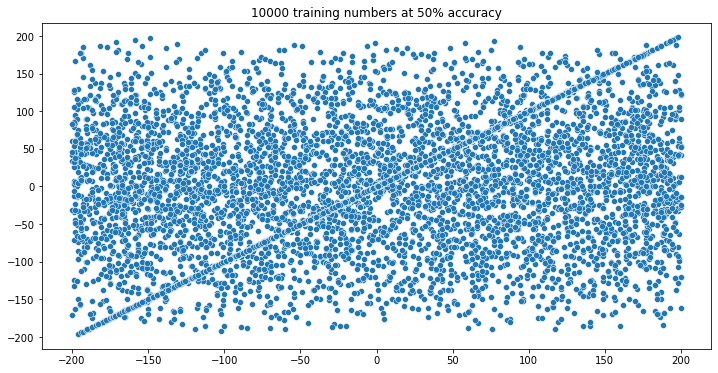

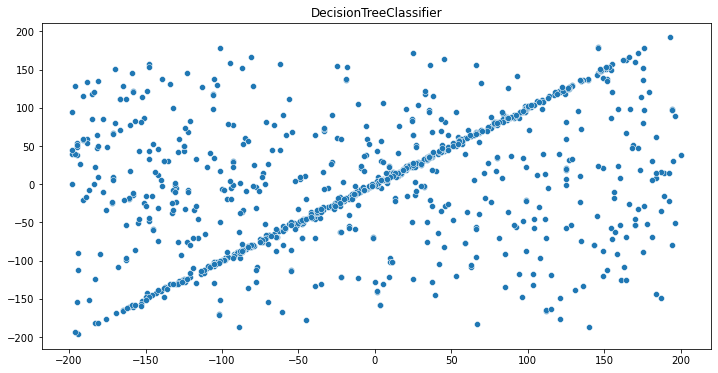

In [63]:
compare_scatter(14, 0, 1000)

10000 training numbers at 50% accuracy
GaussianNB
1000 numbers to test



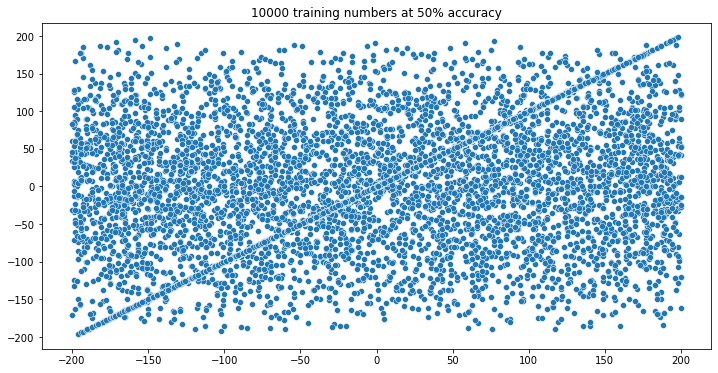

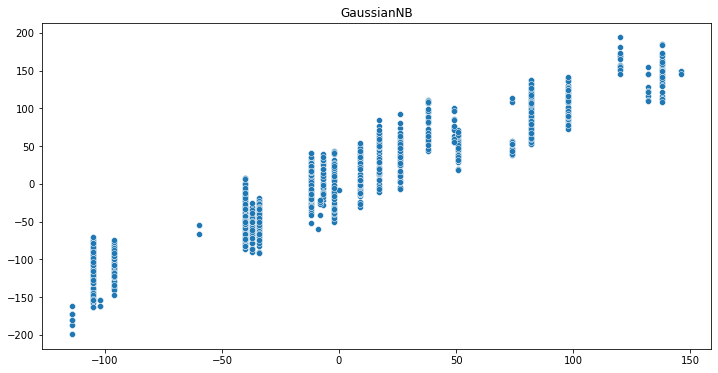

In [25]:
compare_scatter(14, 1, 1000)

10000 training numbers at 50% accuracy
LinearRegression
1000 numbers to test



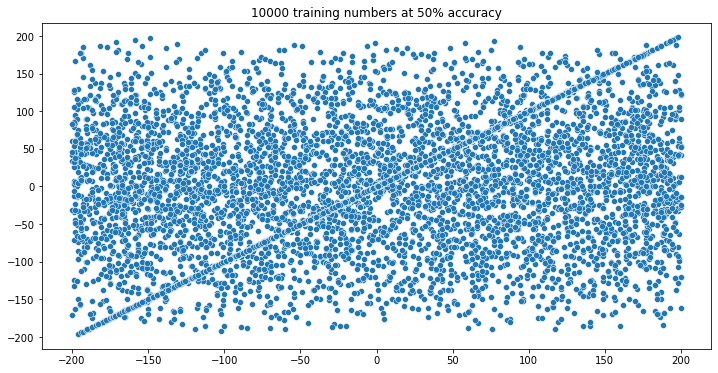

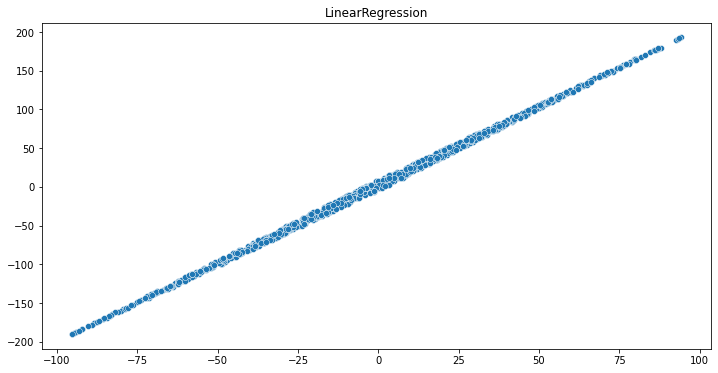

In [26]:
compare_scatter(14, 2, 1000)

10000 training numbers at 50% accuracy
RandomForestClassifier
1000 numbers to test



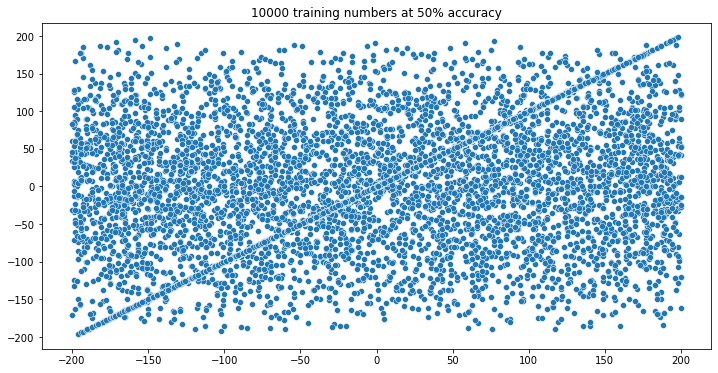

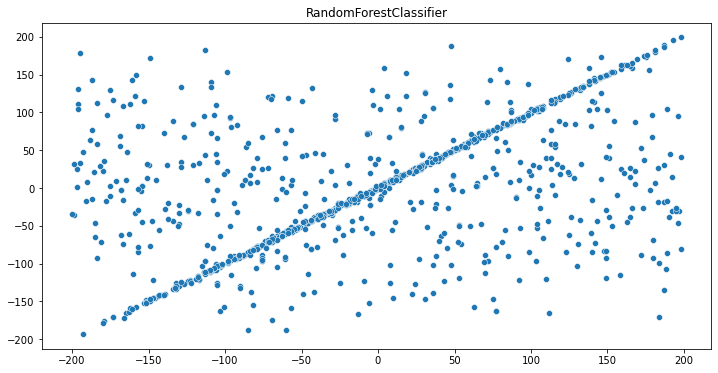

In [27]:
compare_scatter(14, 3, 1000)

10000 training numbers at 50% accuracy
XGBRegressor
1000 numbers to test



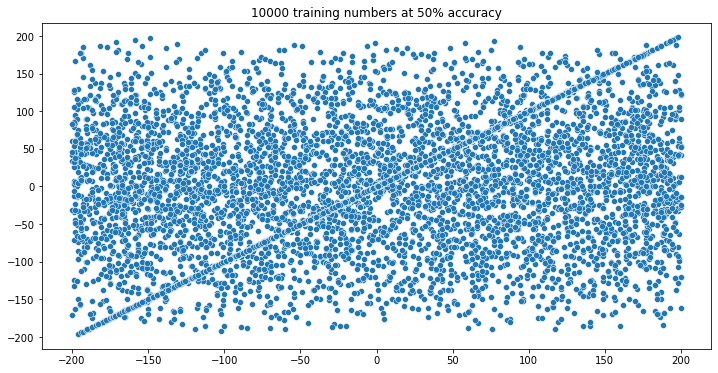

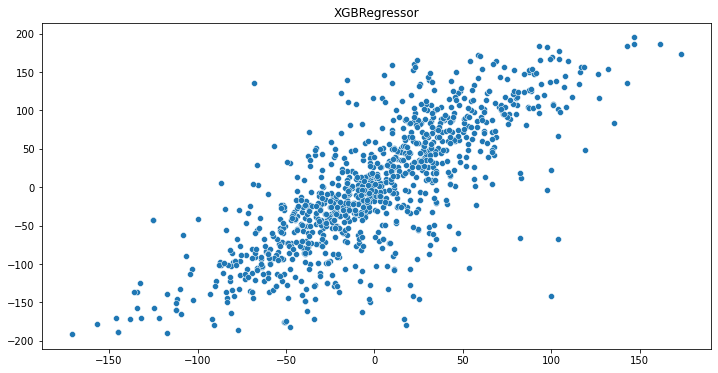

In [28]:
compare_scatter(14, 4, 1000)

10000 training numbers at 50% accuracy
Keras.TensorFlow
1000 numbers to test



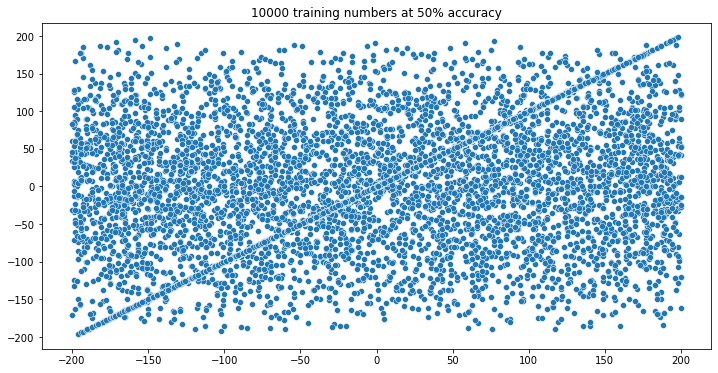

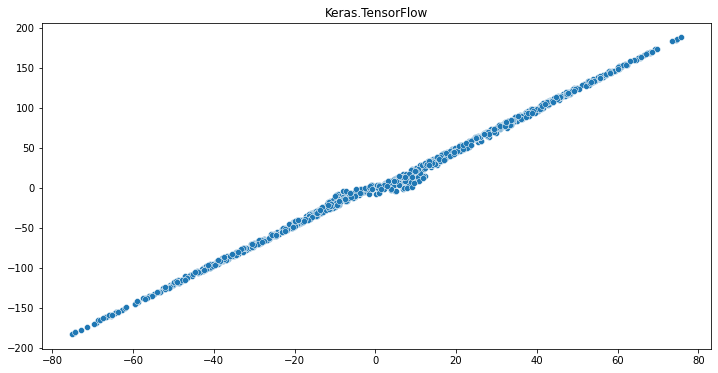

In [64]:
compare_scatter(14, 5, 1000)

### Compare Scatterplots of Predictions for 90% Accuracy

10000 training numbers at 90% accuracy
DecisionTreeClassifier
1000 numbers to test



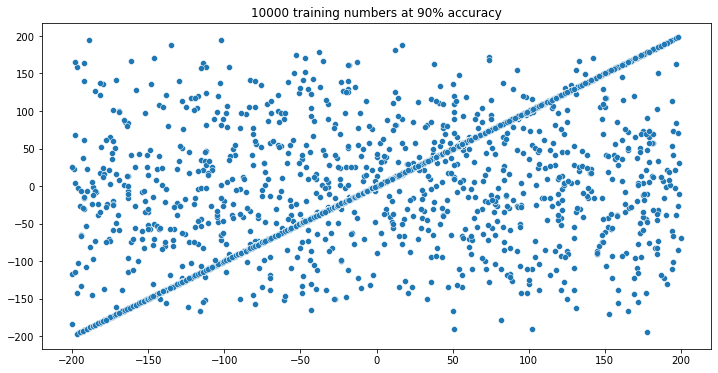

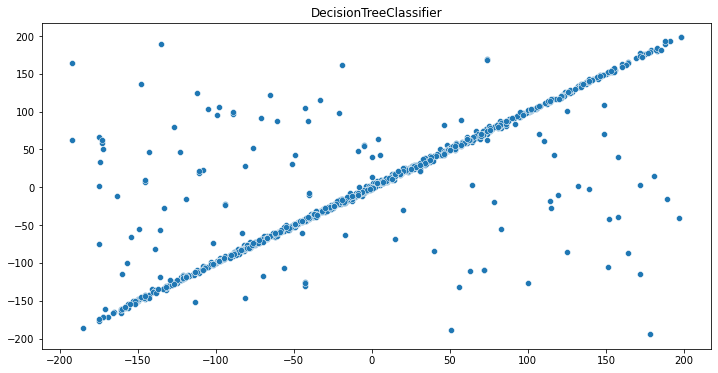

In [30]:
compare_scatter(12, 0, 1000)

10000 training numbers at 90% accuracy
GaussianNB
1000 numbers to test



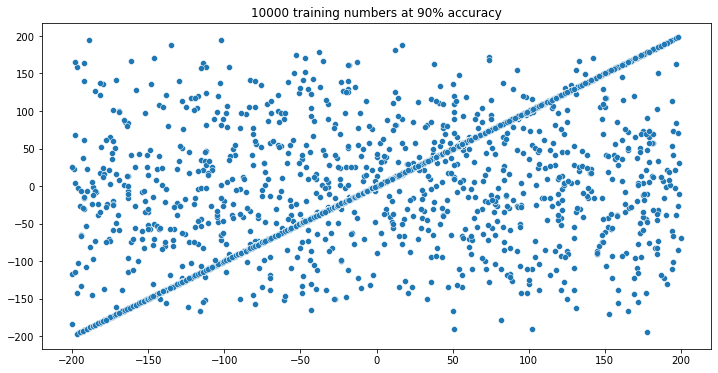

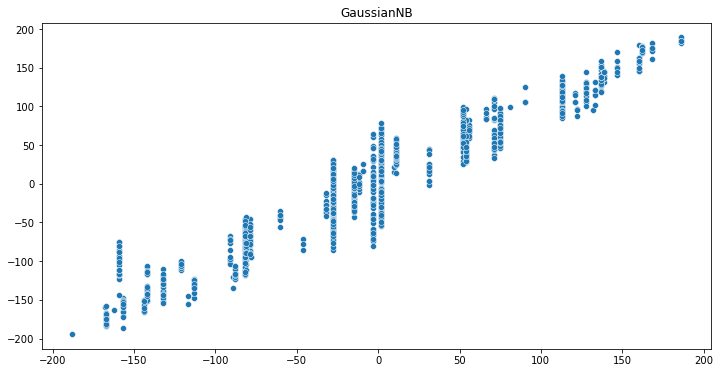

In [31]:
compare_scatter(12, 1, 1000)

10000 training numbers at 90% accuracy
LinearRegression
1000 numbers to test



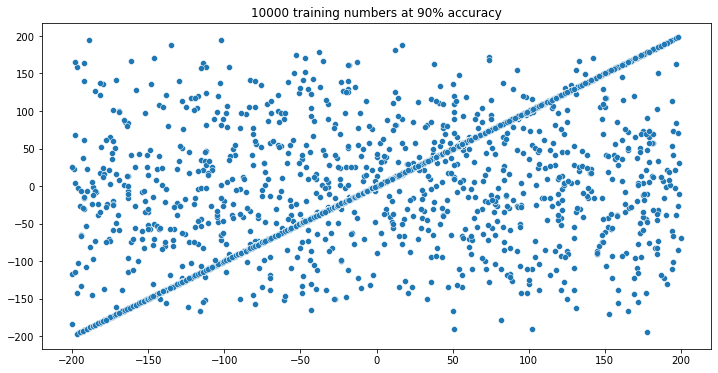

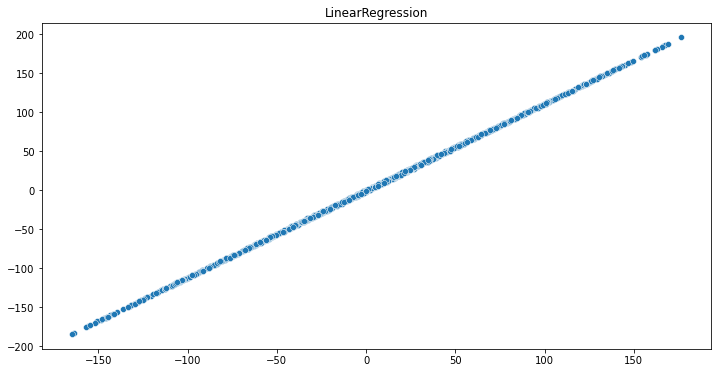

In [32]:
compare_scatter(12, 2, 1000)

10000 training numbers at 90% accuracy
RandomForestClassifier
1000 numbers to test



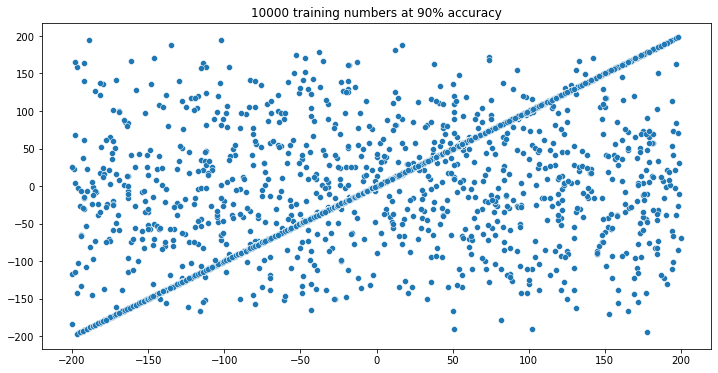

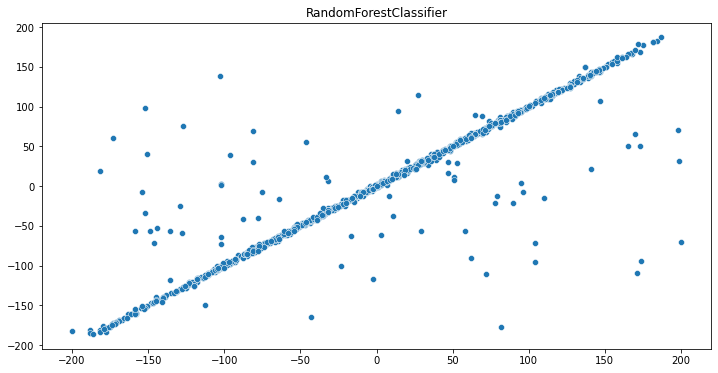

In [33]:
compare_scatter(12, 3, 1000)

10000 training numbers at 90% accuracy
XGBRegressor
1000 numbers to test



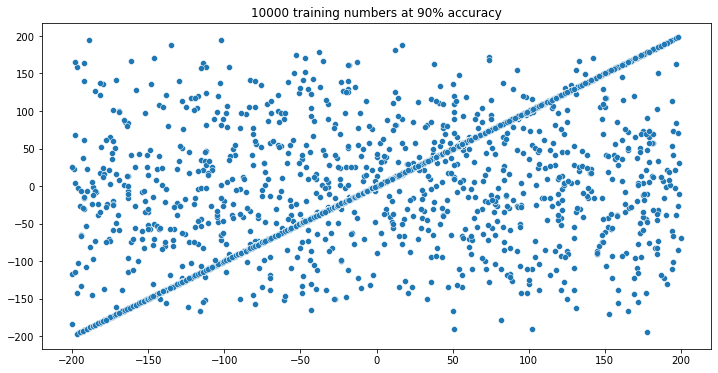

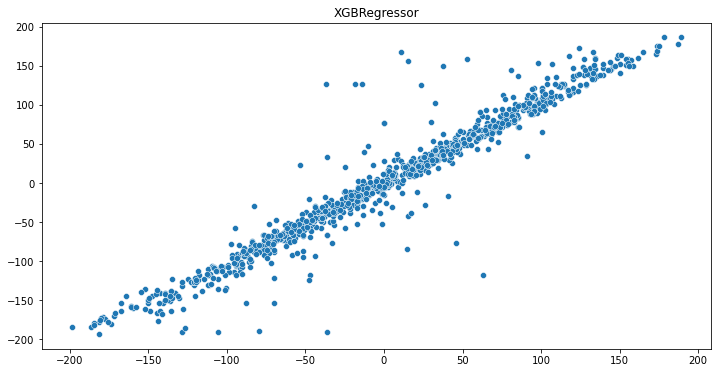

In [34]:
compare_scatter(12, 4, 1000)

10000 training numbers at 90% accuracy
Keras.TensorFlow
1000 numbers to test



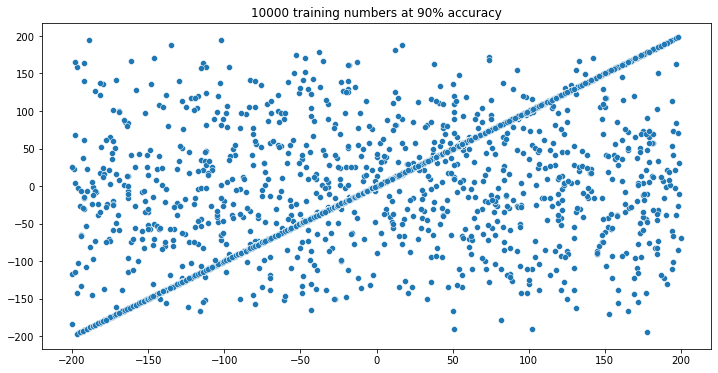

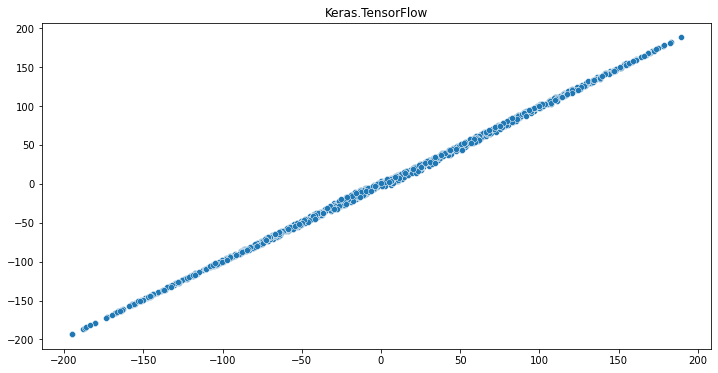

In [65]:
compare_scatter(12, 5, 1000)

### Compare Scatterplots of Predictions for 100% Accuracy

10000 training numbers at 100% accuracy
DecisionTreeClassifier
1000 numbers to test



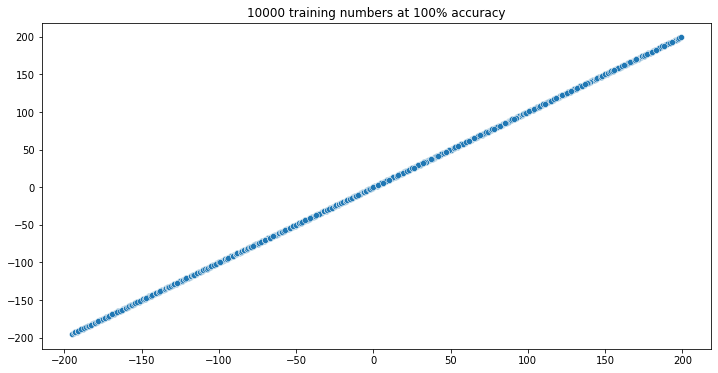

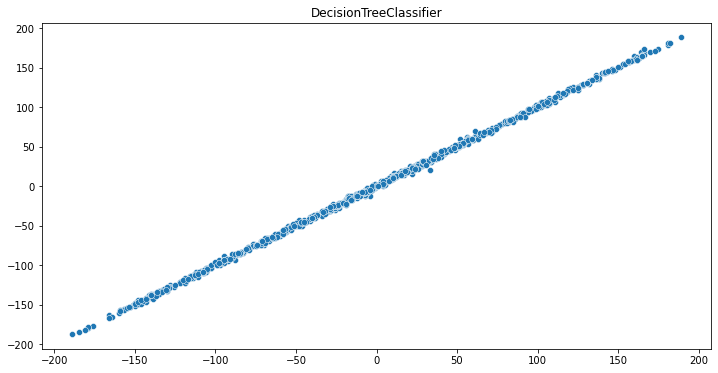

In [36]:
compare_scatter(10, 0, 1000)

10000 training numbers at 100% accuracy
GaussianNB
1000 numbers to test



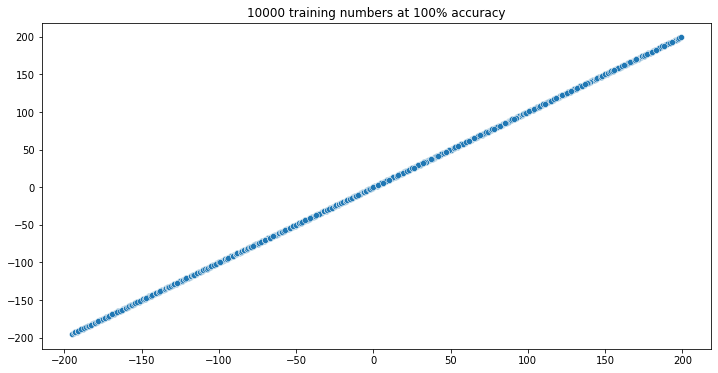

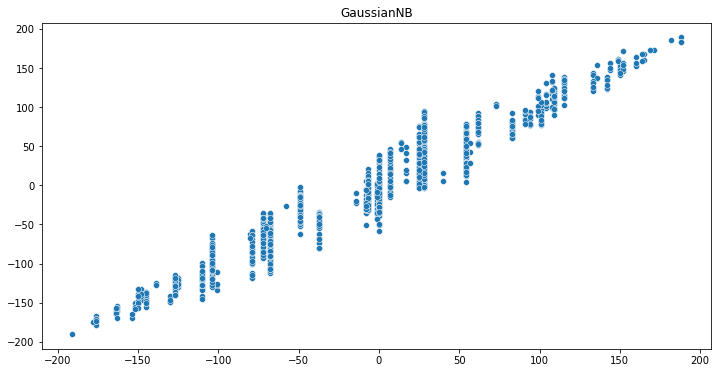

In [37]:
compare_scatter(10, 1, 1000)

10000 training numbers at 100% accuracy
LinearRegression
1000 numbers to test



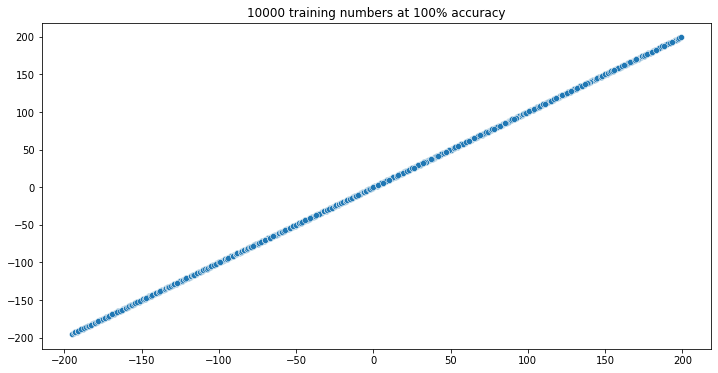

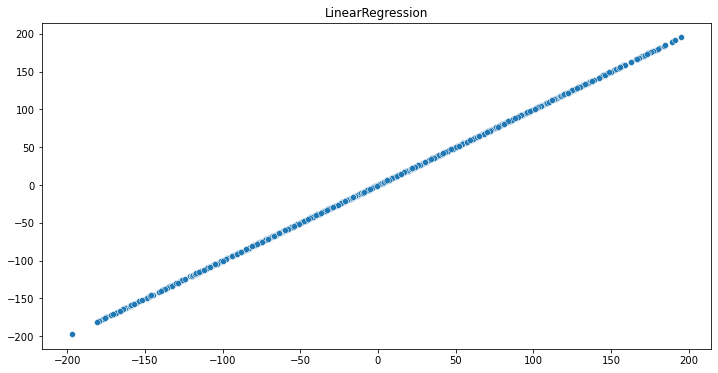

In [38]:
compare_scatter(10, 2, 1000)

10000 training numbers at 100% accuracy
RandomForestClassifier
1000 numbers to test



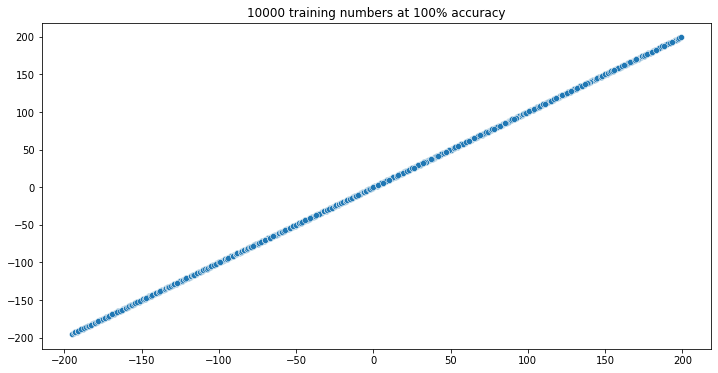

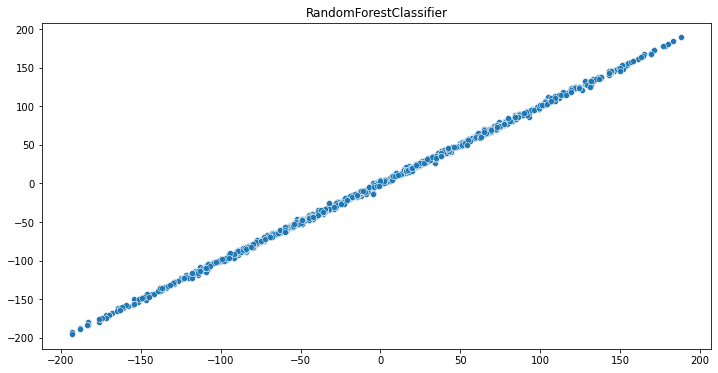

In [39]:
compare_scatter(10, 3, 1000)

10000 training numbers at 100% accuracy
XGBRegressor
1000 numbers to test



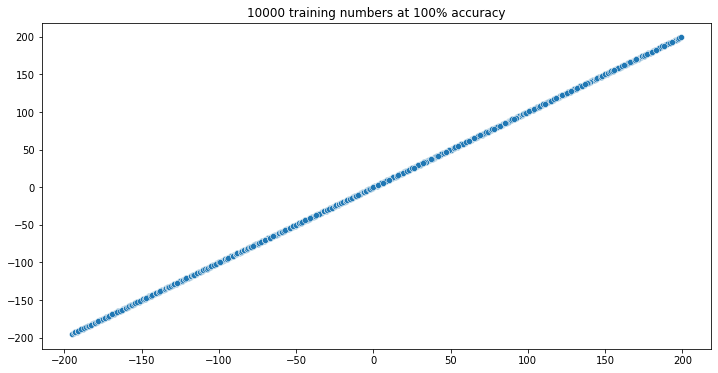

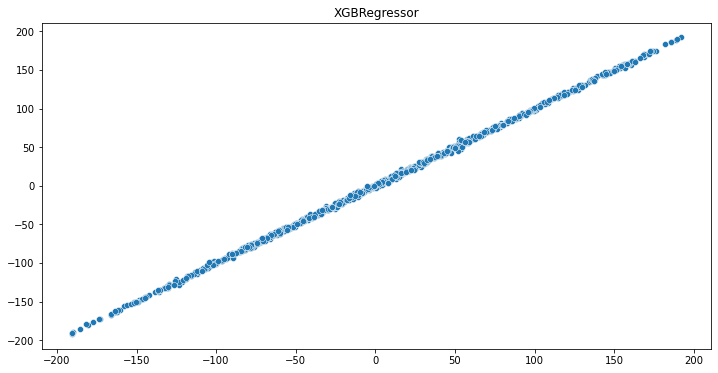

In [40]:
compare_scatter(10, 4, 1000)

10000 training numbers at 100% accuracy
Keras.TensorFlow
1000 numbers to test



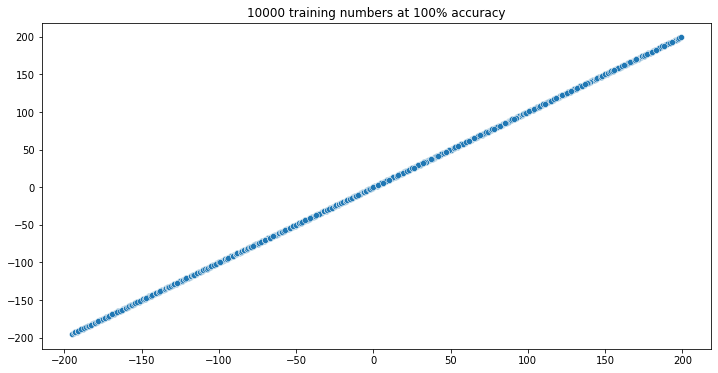

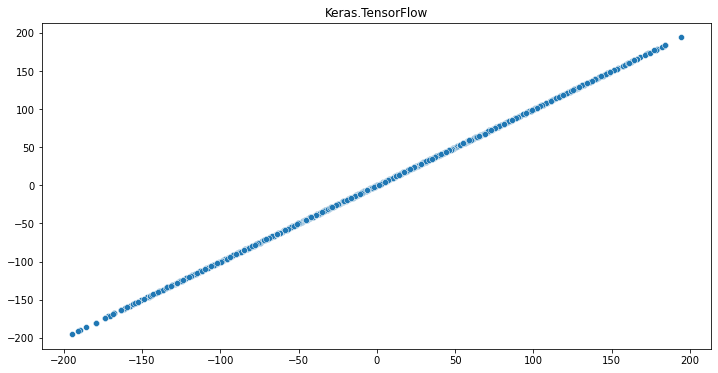

In [66]:
compare_scatter(10, 5, 1000)

# Predictions Grid Visualisation

In [42]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(get_name_of_model(current_train_model))

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

### Grids of Predictions for Each Model - 50% Accuracy

In [43]:
pd.DataFrame(prediction_grid(14, 0, 0, 10))

10000 training numbers at 50% accuracy
DecisionTreeClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,-19,3,8,7,7,7,7,7,83,83,83
1,-19,3,8,6,-69,-69,-69,-69,-69,10,10
2,-19,3,8,6,-112,-112,-112,-112,-112,88,88
3,-19,3,8,6,-24,-24,11,11,11,11,11
4,-19,3,8,6,-24,-24,11,11,11,11,11
5,5,5,8,6,-24,-24,12,12,71,71,71
6,5,5,8,6,-24,-24,12,12,71,71,71
7,111,111,8,-50,-24,-24,12,12,71,71,71
8,-49,-49,-49,-50,-24,-24,-143,-143,-143,-143,-16
9,-49,-49,-49,-50,-24,-24,-143,-143,-143,-143,-16


In [44]:
pd.DataFrame(prediction_grid(14, 1, 0, 10))

10000 training numbers at 50% accuracy
GaussianNB


,0,1,2,3,4,5,6,7,8,9,10
0,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
1,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
2,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
3,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
4,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
5,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
6,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
7,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
8,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
9,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12


In [45]:
pd.DataFrame(prediction_grid(14, 2, 0, 10))

10000 training numbers at 50% accuracy
LinearRegression


,0,1,2,3,4,5,6,7,8,9,10
0,-1,-1,-0,0,1,1,2,2,3,3,4
1,-1,-0,0,1,1,2,2,3,3,4,4
2,-0,0,1,1,2,2,3,3,4,4,5
3,0,1,1,2,2,3,3,4,4,5,5
4,1,1,2,2,3,3,4,4,5,5,6
5,1,2,2,3,3,4,4,5,5,6,6
6,2,2,3,3,4,4,5,5,6,6,7
7,2,3,3,4,4,5,5,6,6,7,7
8,2,3,4,4,5,5,6,6,7,7,8
9,3,3,4,5,5,6,6,7,7,8,8


In [46]:
pd.DataFrame(prediction_grid(14, 3, 0, 10))

10000 training numbers at 50% accuracy
RandomForestClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,-2,-2,-2,7,7,7,7,7,83,83,83
1,-2,3,-2,6,-24,2,178,7,141,10,10
2,-2,3,8,6,-112,-112,-112,-112,178,88,88
3,-19,3,3,6,6,6,11,-112,11,88,11
4,5,3,8,6,-24,6,12,-112,11,88,16
5,5,3,8,6,-24,-24,12,-112,71,88,-95
6,5,8,8,8,-24,-24,12,12,71,71,71
7,111,111,8,-50,-24,-24,12,192,71,-143,-16
8,111,-49,-49,-50,-49,-49,-143,-143,-143,-143,-16
9,10,-49,-73,-50,-50,-50,12,192,19,-143,-16


In [47]:
pd.DataFrame(prediction_grid(14, 4, 0, 10))

10000 training numbers at 50% accuracy
XGBRegressor


,0,1,2,3,4,5,6,7,8,9,10
0,-4,6,6,1,13,31,9,9,21,11,11
1,6,15,15,24,36,53,32,32,44,34,34
2,-3,7,7,2,14,32,10,10,22,13,13
3,-21,-11,-11,-16,-4,14,-8,-8,4,-5,-5
4,-21,-11,-11,-16,-4,14,-8,-8,4,-5,-5
5,-16,-11,-11,-16,-4,14,-8,-8,4,-5,-5
6,-16,-11,-11,-16,-4,14,-8,-8,4,-5,-5
7,-11,-6,-6,-10,2,19,-2,-2,10,-0,-0
8,-25,-19,-19,-24,-12,6,-16,-16,-4,-13,-13
9,-36,-31,-31,-35,-23,14,3,3,-15,-25,-25


In [48]:
pd.DataFrame(prediction_grid(14, 5, 0, 10))

10000 training numbers at 50% accuracy
Keras.TensorFlow


,0,1,2,3,4,5,6,7,8,9,10
0,-0,0,1,1,1,2,2,2,3,3,4
1,0,1,1,1,2,2,2,3,3,4,4
2,1,1,1,2,2,3,3,3,4,4,4
3,1,1,2,2,3,3,3,4,4,4,5
4,2,2,2,3,3,3,4,4,4,5,5
5,2,2,3,3,3,4,4,4,5,5,6
6,2,3,3,3,4,4,4,5,5,6,6
7,3,3,4,4,4,5,5,5,6,6,6
8,3,4,4,4,5,5,5,6,6,6,7
9,4,4,4,5,5,5,6,6,6,7,7


### Grids of Predictions for Each Model - 90% Accuracy

In [49]:
pd.DataFrame(prediction_grid(12, 0, 0, 10))

10000 training numbers at 90% accuracy
DecisionTreeClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,-2,1,2,3,5,8,8,8,8,8,8
1,-2,2,2,3,5,8,8,8,8,8,8
2,-141,3,3,3,5,7,7,35,35,35,35
3,-141,3,3,3,5,8,8,10,10,10,10
4,-141,3,3,3,5,8,8,10,10,10,10
5,-141,3,3,3,12,11,12,13,13,15,15
6,2,2,2,3,12,11,12,13,13,15,15
7,-145,-145,-145,3,12,14,14,14,17,17,17
8,-145,-145,-145,3,12,14,14,14,17,17,17
9,6,6,6,3,12,14,14,14,18,18,18


In [50]:
pd.DataFrame(prediction_grid(12, 1, 0, 10))

10000 training numbers at 90% accuracy
GaussianNB


,0,1,2,3,4,5,6,7,8,9,10
0,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
1,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
2,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
3,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
4,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
5,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
6,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
7,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
8,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15
9,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15,-15


In [51]:
pd.DataFrame(prediction_grid(12, 2, 0, 10))

10000 training numbers at 90% accuracy
LinearRegression


,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9,9
1,1,2,3,4,5,6,7,8,9,9,10
2,2,3,4,5,6,7,8,9,9,10,11
3,3,4,5,6,7,8,9,9,10,11,12
4,4,5,6,7,8,9,9,10,11,12,13
5,5,6,7,8,8,9,10,11,12,13,14
6,6,7,8,8,9,10,11,12,13,14,15
7,7,8,8,9,10,11,12,13,14,15,16
8,8,8,9,10,11,12,13,14,15,16,17
9,8,9,10,11,12,13,14,15,16,17,17


In [52]:
pd.DataFrame(prediction_grid(12, 3, 0, 10))

10000 training numbers at 90% accuracy
RandomForestClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,-1,193,2,3,3,3,4,8,8,8,-98
1,-2,2,2,5,5,5,5,10,8,13,15
2,-141,3,3,3,7,7,7,10,35,35,15
3,-102,3,8,8,8,8,8,10,10,10,15
4,0,3,2,3,5,8,12,10,35,15,15
5,0,-145,182,15,12,11,12,13,15,15,15
6,2,-145,11,11,12,11,12,13,13,15,15
7,-145,-145,-145,12,12,11,12,13,13,15,15
8,9,-145,182,12,12,12,14,13,17,17,17
9,9,-145,182,15,12,71,14,13,18,18,18


In [53]:
pd.DataFrame(prediction_grid(12, 4, 0, 10))

10000 training numbers at 90% accuracy
XGBRegressor


,0,1,2,3,4,5,6,7,8,9,10
0,-3,33,3,2,4,6,6,1,5,2,-2
1,-5,-2,6,5,7,10,10,4,16,14,9
2,-5,-2,6,5,7,10,10,4,11,9,5
3,-13,-9,9,8,10,12,19,13,20,18,13
4,-9,-5,13,12,14,16,23,17,21,18,14
5,-4,-6,17,16,18,21,21,15,19,16,12
6,0,-2,17,16,18,21,21,15,19,16,12
7,-28,-30,-12,-12,-10,-8,-8,-14,-10,-12,-16
8,9,7,19,19,21,23,23,18,21,19,15
9,12,10,23,22,24,27,27,21,25,23,18


In [54]:
pd.DataFrame(prediction_grid(12, 5, 0, 10))

10000 training numbers at 90% accuracy
Keras.TensorFlow


,0,1,2,3,4,5,6,7,8,9,10
0,-0,1,2,3,4,4,5,6,7,8,9
1,1,2,3,4,4,5,6,7,8,9,10
2,2,3,4,5,6,6,7,8,9,10,11
3,3,4,5,6,7,7,8,9,10,11,12
4,4,5,6,7,8,8,9,10,11,12,13
5,5,6,7,8,9,9,10,11,12,13,14
6,6,7,8,9,10,11,11,12,13,14,15
7,7,8,9,10,11,12,12,13,14,15,16
8,8,9,10,11,12,13,14,14,15,16,17
9,9,10,11,12,13,14,15,15,16,17,18


### Grids of Predictions for Each Model - 100% Accuracy

In [55]:
pd.DataFrame(prediction_grid(10, 0, 0, 10))

10000 training numbers at 100% accuracy
DecisionTreeClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,1,1,3,4,5,5,5,8,6,6,6
1,2,2,3,4,5,5,5,8,6,6,6
2,2,2,4,7,7,7,7,10,10,10,10
3,2,2,4,7,7,7,7,10,10,10,10
4,4,4,4,7,7,7,7,10,10,10,10
5,7,7,7,8,8,8,13,13,13,13,17
6,6,6,6,11,11,11,11,14,14,14,17
7,6,6,6,11,11,11,11,14,14,14,17
8,6,6,6,11,16,16,16,16,16,17,19
9,8,8,8,11,16,16,16,16,16,17,19


In [56]:
pd.DataFrame(prediction_grid(10, 1, 0, 10))

10000 training numbers at 100% accuracy
GaussianNB


,0,1,2,3,4,5,6,7,8,9,10
0,25,25,25,25,25,54,54,54,54,54,54
1,25,25,25,25,54,54,54,54,54,54,54
2,25,25,25,54,54,54,54,54,54,54,54
3,25,54,54,54,54,54,54,54,54,54,54
4,54,54,54,54,54,54,54,54,54,54,54
5,54,54,54,54,54,54,54,54,54,54,54
6,54,54,54,54,54,54,54,54,54,54,54
7,54,54,54,54,54,54,54,54,54,54,54
8,54,54,54,54,54,54,54,54,54,54,54
9,54,54,54,54,54,54,54,54,54,54,54


In [57]:
pd.DataFrame(prediction_grid(10, 2, 0, 10))

10000 training numbers at 100% accuracy
LinearRegression


,0,1,2,3,4,5,6,7,8,9,10
0,-0,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10,11
2,2,3,4,5,6,7,8,9,10,11,12
3,3,4,5,6,7,8,9,10,11,12,13
4,4,5,6,7,8,9,10,11,12,13,14
5,5,6,7,8,9,10,11,12,13,14,15
6,6,7,8,9,10,11,12,13,14,15,16
7,7,8,9,10,11,12,13,14,15,16,17
8,8,9,10,11,12,13,14,15,16,17,18
9,9,10,11,12,13,14,15,16,17,18,19


In [58]:
pd.DataFrame(prediction_grid(10, 3, 0, 10))

10000 training numbers at 100% accuracy
RandomForestClassifier


,0,1,2,3,4,5,6,7,8,9,10
0,-1,1,1,1,5,1,5,8,6,14,14
1,2,2,3,4,5,5,5,8,8,8,8
2,2,2,4,4,7,7,7,7,7,7,16
3,2,2,7,7,7,7,10,10,10,10,10
4,4,4,4,4,7,7,7,10,13,17,17
5,4,7,7,8,8,11,13,13,13,13,13
6,6,6,7,11,11,11,11,14,13,17,17
7,6,6,11,11,11,11,14,14,14,17,17
8,6,11,11,11,11,11,11,16,16,17,17
9,11,12,11,11,16,11,11,17,16,17,17


In [59]:
pd.DataFrame(prediction_grid(10, 4, 0, 10))

10000 training numbers at 100% accuracy
XGBRegressor


,0,1,2,3,4,5,6,7,8,9,10
0,-4,2,3,4,5,7,6,5,6,7,9
1,-3,3,3,4,5,7,6,6,6,7,9
2,0,4,4,5,6,7,11,11,11,12,13
3,1,5,5,6,6,8,12,11,12,12,14
4,3,6,7,8,8,10,14,14,14,14,16
5,3,7,7,8,9,10,15,15,15,15,17
6,3,7,8,8,9,10,15,15,15,15,17
7,5,9,9,10,11,12,17,17,17,17,19
8,4,9,9,10,11,12,17,17,17,17,19
9,6,10,11,12,12,13,18,18,19,19,20


In [60]:
pd.DataFrame(prediction_grid(10, 5, 0, 10))

10000 training numbers at 100% accuracy
Keras.TensorFlow


,0,1,2,3,4,5,6,7,8,9,10
0,-0,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10,11
2,2,3,4,5,6,7,8,9,10,11,12
3,3,4,5,6,7,8,9,10,11,12,13
4,4,5,6,7,8,9,10,11,12,13,14
5,5,6,7,8,9,10,11,12,13,14,15
6,6,7,8,9,10,11,12,13,14,15,16
7,7,8,9,10,11,12,13,14,15,16,17
8,8,9,10,11,12,13,14,15,16,17,18
9,9,10,11,12,13,14,15,16,17,18,19


# Discussion and Conclusions

# Further Study

In [61]:
# Interesting stuff to maybe look at later
# linear regression with HUUUUGE data sets, probably work without good accuracy
# how do I get a neural net good at adding, super deep/wide nets seem to work slightly better